In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import joblib

from sklearn.metrics import (
    f1_score,
    recall_score,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    RocCurveDisplay
)

import optuna
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

c:\Users\Admin\Git\loan-default-prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load train, test features
data = joblib.load("../artifacts/baseline_dataset.pkl")

X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

In [4]:
pd.DataFrame(
    {
        "Data Types": X_train.dtypes,
        "Missing Values": X_train.isnull().sum(),
        "Unique Values": X_train.nunique(),
        "Sample Values": [X_train[col].sample(3).tolist() for col in X_train.columns]
    })

,Data Types,Missing Values,Unique Values,Sample Values
ID,int64,0,133803,"[103281, 172033, 129792]"
year,int64,0,1,"[2019, 2019, 2019]"
loan_limit,object,0,2,"[ncf, cf, cf]"
Gender,object,0,4,"[Joint, Sex Not Available, Joint]"
approv_in_adv,object,0,2,"[nopre, nopre, nopre]"
loan_type,object,0,3,"[type3, type1, type1]"
loan_purpose,object,0,4,"[p3, p1, p4]"
Credit_Worthiness,object,0,2,"[l1, l1, l1]"
open_credit,object,0,2,"[nopc, nopc, nopc]"
business_or_commercial,object,0,2,"[nob/c, nob/c, nob/c]"


[I 2026-01-13 16:55:42,957] A new study created in memory with name: no-name-45adc506-1966-4461-8846-fe985f91dc09
Best trial: 0. Best value: 0.703804:   2%|▏         | 1/60 [00:06<05:54,  6.01s/it, 6.01/1800 seconds]

[I 2026-01-13 16:55:48,906] Trial 0 finished with value: 0.7038043409629866 and parameters: {'n_estimators': 76, 'max_depth': 9, 'min_samples_leaf': 24, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7038043409629866.


Best trial: 0. Best value: 0.703804:   3%|▎         | 2/60 [00:10<05:09,  5.34s/it, 10.88/1800 seconds]

[I 2026-01-13 16:55:53,773] Trial 1 finished with value: 0.6862611422229703 and parameters: {'n_estimators': 68, 'max_depth': 6, 'min_samples_leaf': 28, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7038043409629866.


Best trial: 2. Best value: 0.715834:   5%|▌         | 3/60 [00:21<07:10,  7.55s/it, 21.06/1800 seconds]

[I 2026-01-13 16:56:03,952] Trial 2 finished with value: 0.715833810660826 and parameters: {'n_estimators': 41, 'max_depth': 10, 'min_samples_leaf': 26, 'max_features': 0.5}. Best is trial 2 with value: 0.715833810660826.


Best trial: 2. Best value: 0.715834:   7%|▋         | 4/60 [00:25<06:04,  6.51s/it, 25.97/1800 seconds]

[I 2026-01-13 16:56:08,832] Trial 3 finished with value: 0.6996186548188609 and parameters: {'n_estimators': 54, 'max_depth': 8, 'min_samples_leaf': 23, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.715833810660826.


Best trial: 2. Best value: 0.715834:   8%|▊         | 5/60 [00:30<05:17,  5.78s/it, 30.46/1800 seconds]

[I 2026-01-13 16:56:13,313] Trial 4 finished with value: 0.7081775723362703 and parameters: {'n_estimators': 40, 'max_depth': 9, 'min_samples_leaf': 20, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.715833810660826.


Best trial: 2. Best value: 0.715834:  10%|█         | 6/60 [00:40<06:27,  7.17s/it, 40.34/1800 seconds]

[I 2026-01-13 16:56:23,222] Trial 5 finished with value: 0.7091099435715021 and parameters: {'n_estimators': 46, 'max_depth': 9, 'min_samples_leaf': 29, 'max_features': 0.5}. Best is trial 2 with value: 0.715833810660826.


Best trial: 2. Best value: 0.715834:  12%|█▏        | 7/60 [00:51<07:35,  8.59s/it, 51.85/1800 seconds]

[I 2026-01-13 16:56:34,739] Trial 6 finished with value: 0.6956172925638283 and parameters: {'n_estimators': 70, 'max_depth': 6, 'min_samples_leaf': 49, 'max_features': 0.5}. Best is trial 2 with value: 0.715833810660826.


Best trial: 2. Best value: 0.715834:  13%|█▎        | 8/60 [00:56<06:23,  7.37s/it, 56.59/1800 seconds]

[I 2026-01-13 16:56:39,481] Trial 7 finished with value: 0.7061236453877987 and parameters: {'n_estimators': 53, 'max_depth': 11, 'min_samples_leaf': 42, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.715833810660826.


Best trial: 2. Best value: 0.715834:  13%|█▎        | 8/60 [01:10<06:23,  7.37s/it, 56.59/1800 seconds]

[I 2026-01-13 16:56:52,997] Trial 8 finished with value: 0.7149392081364118 and parameters: {'n_estimators': 60, 'max_depth': 10, 'min_samples_leaf': 47, 'max_features': 0.5}. Best is trial 2 with value: 0.715833810660826.


Best trial: 9. Best value: 0.716131:  17%|█▋        | 10/60 [01:28<09:59, 11.99s/it, 88.18/1800 seconds]

[I 2026-01-13 16:57:11,066] Trial 9 finished with value: 0.7161310834413088 and parameters: {'n_estimators': 80, 'max_depth': 10, 'min_samples_leaf': 37, 'max_features': 0.5}. Best is trial 9 with value: 0.7161310834413088.


Best trial: 10. Best value: 0.72584:  18%|█▊        | 11/60 [01:43<10:32, 12.91s/it, 103.20/1800 seconds]

[I 2026-01-13 16:57:26,088] Trial 10 finished with value: 0.7258395852084149 and parameters: {'n_estimators': 79, 'max_depth': 12, 'min_samples_leaf': 37, 'max_features': 0.5}. Best is trial 10 with value: 0.7258395852084149.


Best trial: 11. Best value: 0.726046:  20%|██        | 12/60 [01:58<10:52, 13.59s/it, 118.32/1800 seconds]

[I 2026-01-13 16:57:41,210] Trial 11 finished with value: 0.726045805208432 and parameters: {'n_estimators': 80, 'max_depth': 12, 'min_samples_leaf': 38, 'max_features': 0.5}. Best is trial 11 with value: 0.726045805208432.


Best trial: 12. Best value: 0.726411:  22%|██▏       | 13/60 [02:12<10:51, 13.86s/it, 132.81/1800 seconds]

[I 2026-01-13 16:57:55,704] Trial 12 finished with value: 0.7264110250987112 and parameters: {'n_estimators': 73, 'max_depth': 12, 'min_samples_leaf': 36, 'max_features': 0.5}. Best is trial 12 with value: 0.7264110250987112.


Best trial: 13. Best value: 0.727966:  23%|██▎       | 14/60 [02:26<10:37, 13.85s/it, 146.63/1800 seconds]

[I 2026-01-13 16:58:09,523] Trial 13 finished with value: 0.727966038417667 and parameters: {'n_estimators': 71, 'max_depth': 12, 'min_samples_leaf': 35, 'max_features': 0.5}. Best is trial 13 with value: 0.727966038417667.


Best trial: 14. Best value: 0.728894:  25%|██▌       | 15/60 [02:40<10:16, 13.71s/it, 160.01/1800 seconds]

[I 2026-01-13 16:58:22,888] Trial 14 finished with value: 0.7288938378542742 and parameters: {'n_estimators': 68, 'max_depth': 12, 'min_samples_leaf': 32, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  27%|██▋       | 16/60 [02:52<09:50, 13.41s/it, 172.73/1800 seconds]

[I 2026-01-13 16:58:35,620] Trial 15 finished with value: 0.7242557271975544 and parameters: {'n_estimators': 65, 'max_depth': 11, 'min_samples_leaf': 32, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  28%|██▊       | 17/60 [03:05<09:24, 13.14s/it, 185.23/1800 seconds]

[I 2026-01-13 16:58:48,119] Trial 16 finished with value: 0.7222462197674161 and parameters: {'n_estimators': 62, 'max_depth': 11, 'min_samples_leaf': 43, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  30%|███       | 18/60 [03:16<08:47, 12.57s/it, 196.48/1800 seconds]

[I 2026-01-13 16:58:59,371] Trial 17 finished with value: 0.7025519709035842 and parameters: {'n_estimators': 71, 'max_depth': 7, 'min_samples_leaf': 17, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  32%|███▏      | 19/60 [03:27<08:22, 12.25s/it, 207.98/1800 seconds]

[I 2026-01-13 16:59:10,876] Trial 18 finished with value: 0.7278998081504642 and parameters: {'n_estimators': 57, 'max_depth': 12, 'min_samples_leaf': 33, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  33%|███▎      | 20/60 [03:40<08:15, 12.38s/it, 220.65/1800 seconds]

[I 2026-01-13 16:59:23,542] Trial 19 finished with value: 0.7243886168220411 and parameters: {'n_estimators': 66, 'max_depth': 11, 'min_samples_leaf': 32, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  35%|███▌      | 21/60 [03:53<08:03, 12.40s/it, 233.11/1800 seconds]

[I 2026-01-13 16:59:36,002] Trial 20 finished with value: 0.7035034320219187 and parameters: {'n_estimators': 74, 'max_depth': 8, 'min_samples_leaf': 42, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  37%|███▋      | 22/60 [04:04<07:43, 12.19s/it, 244.80/1800 seconds]

[I 2026-01-13 16:59:47,694] Trial 21 finished with value: 0.7266902045056486 and parameters: {'n_estimators': 56, 'max_depth': 12, 'min_samples_leaf': 34, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  38%|███▊      | 23/60 [04:16<07:25, 12.05s/it, 256.53/1800 seconds]

[I 2026-01-13 16:59:59,418] Trial 22 finished with value: 0.7279584163869055 and parameters: {'n_estimators': 58, 'max_depth': 12, 'min_samples_leaf': 30, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  40%|████      | 24/60 [04:26<06:55, 11.54s/it, 266.89/1800 seconds]

[I 2026-01-13 17:00:09,785] Trial 23 finished with value: 0.722263483416936 and parameters: {'n_estimators': 50, 'max_depth': 11, 'min_samples_leaf': 28, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  42%|████▏     | 25/60 [04:39<06:56, 11.90s/it, 279.61/1800 seconds]

[I 2026-01-13 17:00:22,497] Trial 24 finished with value: 0.7280056585618214 and parameters: {'n_estimators': 63, 'max_depth': 12, 'min_samples_leaf': 30, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  43%|████▎     | 26/60 [04:51<06:49, 12.04s/it, 291.97/1800 seconds]

[I 2026-01-13 17:00:34,863] Trial 25 finished with value: 0.7174894742470462 and parameters: {'n_estimators': 64, 'max_depth': 10, 'min_samples_leaf': 25, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  45%|████▌     | 27/60 [04:57<05:30, 10.01s/it, 297.26/1800 seconds]

[I 2026-01-13 17:00:40,151] Trial 26 finished with value: 0.7079662515635562 and parameters: {'n_estimators': 67, 'max_depth': 11, 'min_samples_leaf': 39, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  47%|████▋     | 28/60 [05:09<05:45, 10.81s/it, 309.94/1800 seconds]

[I 2026-01-13 17:00:52,826] Trial 27 finished with value: 0.7269320087512444 and parameters: {'n_estimators': 62, 'max_depth': 12, 'min_samples_leaf': 34, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  48%|████▊     | 29/60 [05:24<06:10, 11.94s/it, 324.51/1800 seconds]

[I 2026-01-13 17:01:07,344] Trial 28 finished with value: 0.7246879084585838 and parameters: {'n_estimators': 70, 'max_depth': 11, 'min_samples_leaf': 22, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  50%|█████     | 30/60 [05:31<05:14, 10.48s/it, 331.60/1800 seconds]

[I 2026-01-13 17:01:14,479] Trial 29 finished with value: 0.7108310995877956 and parameters: {'n_estimators': 75, 'max_depth': 12, 'min_samples_leaf': 31, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  52%|█████▏    | 31/60 [05:48<05:59, 12.41s/it, 348.51/1800 seconds]

[I 2026-01-13 17:01:31,395] Trial 30 finished with value: 0.7177481557222748 and parameters: {'n_estimators': 77, 'max_depth': 10, 'min_samples_leaf': 27, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  53%|█████▎    | 32/60 [06:00<05:46, 12.39s/it, 360.84/1800 seconds]

[I 2026-01-13 17:01:43,723] Trial 31 finished with value: 0.7261215871855713 and parameters: {'n_estimators': 58, 'max_depth': 12, 'min_samples_leaf': 31, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  55%|█████▌    | 33/60 [06:13<05:39, 12.58s/it, 373.87/1800 seconds]

[I 2026-01-13 17:01:56,759] Trial 32 finished with value: 0.7280056585618214 and parameters: {'n_estimators': 63, 'max_depth': 12, 'min_samples_leaf': 30, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  57%|█████▋    | 34/60 [06:26<05:26, 12.56s/it, 386.38/1800 seconds]

[I 2026-01-13 17:02:09,271] Trial 33 finished with value: 0.7217673291793886 and parameters: {'n_estimators': 63, 'max_depth': 11, 'min_samples_leaf': 34, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  58%|█████▊    | 35/60 [06:31<04:20, 10.43s/it, 391.84/1800 seconds]

[I 2026-01-13 17:02:14,730] Trial 34 finished with value: 0.7126915514479281 and parameters: {'n_estimators': 68, 'max_depth': 12, 'min_samples_leaf': 26, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  60%|██████    | 36/60 [06:45<04:34, 11.43s/it, 405.60/1800 seconds]

[I 2026-01-13 17:02:28,485] Trial 35 finished with value: 0.7245209038636077 and parameters: {'n_estimators': 71, 'max_depth': 11, 'min_samples_leaf': 35, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  62%|██████▏   | 37/60 [06:56<04:19, 11.28s/it, 416.54/1800 seconds]

[I 2026-01-13 17:02:39,420] Trial 36 finished with value: 0.7046488465947598 and parameters: {'n_estimators': 61, 'max_depth': 8, 'min_samples_leaf': 29, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  63%|██████▎   | 38/60 [07:01<03:29,  9.53s/it, 421.97/1800 seconds]

[I 2026-01-13 17:02:44,860] Trial 37 finished with value: 0.712778828035901 and parameters: {'n_estimators': 68, 'max_depth': 12, 'min_samples_leaf': 23, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  65%|██████▌   | 39/60 [07:13<03:34, 10.23s/it, 433.85/1800 seconds]

[I 2026-01-13 17:02:56,737] Trial 38 finished with value: 0.7108384855649473 and parameters: {'n_estimators': 66, 'max_depth': 9, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  67%|██████▋   | 40/60 [07:25<03:31, 10.57s/it, 445.20/1800 seconds]

[I 2026-01-13 17:03:08,082] Trial 39 finished with value: 0.7015731868667886 and parameters: {'n_estimators': 72, 'max_depth': 7, 'min_samples_leaf': 29, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  68%|██████▊   | 41/60 [07:29<02:44,  8.64s/it, 449.35/1800 seconds]

[I 2026-01-13 17:03:12,242] Trial 40 finished with value: 0.70451503957873 and parameters: {'n_estimators': 43, 'max_depth': 10, 'min_samples_leaf': 40, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 14. Best value: 0.728894:  70%|███████   | 42/60 [07:41<02:52,  9.60s/it, 461.18/1800 seconds]

[I 2026-01-13 17:03:24,067] Trial 41 finished with value: 0.7276849698198214 and parameters: {'n_estimators': 59, 'max_depth': 12, 'min_samples_leaf': 30, 'max_features': 0.5}. Best is trial 14 with value: 0.7288938378542742.


Best trial: 42. Best value: 0.728921:  72%|███████▏  | 43/60 [07:52<02:51, 10.11s/it, 472.50/1800 seconds]

[I 2026-01-13 17:03:35,377] Trial 42 finished with value: 0.7289207876180558 and parameters: {'n_estimators': 54, 'max_depth': 12, 'min_samples_leaf': 27, 'max_features': 0.5}. Best is trial 42 with value: 0.7289207876180558.


Best trial: 42. Best value: 0.728921:  73%|███████▎  | 44/60 [08:03<02:46, 10.42s/it, 483.64/1800 seconds]

[I 2026-01-13 17:03:46,530] Trial 43 finished with value: 0.7285830403015942 and parameters: {'n_estimators': 51, 'max_depth': 12, 'min_samples_leaf': 27, 'max_features': 0.5}. Best is trial 42 with value: 0.7289207876180558.


Best trial: 42. Best value: 0.728921:  75%|███████▌  | 45/60 [08:14<02:36, 10.46s/it, 494.18/1800 seconds]

[I 2026-01-13 17:03:57,071] Trial 44 finished with value: 0.7238024512987891 and parameters: {'n_estimators': 50, 'max_depth': 11, 'min_samples_leaf': 25, 'max_features': 0.5}. Best is trial 42 with value: 0.7289207876180558.


Best trial: 42. Best value: 0.728921:  77%|███████▋  | 46/60 [08:25<02:29, 10.66s/it, 505.30/1800 seconds]

[I 2026-01-13 17:04:08,188] Trial 45 finished with value: 0.7282230999098894 and parameters: {'n_estimators': 53, 'max_depth': 12, 'min_samples_leaf': 28, 'max_features': 0.5}. Best is trial 42 with value: 0.7289207876180558.


Best trial: 42. Best value: 0.728921:  78%|███████▊  | 47/60 [08:36<02:19, 10.73s/it, 516.20/1800 seconds]

[I 2026-01-13 17:04:19,081] Trial 46 finished with value: 0.7236754013540455 and parameters: {'n_estimators': 53, 'max_depth': 11, 'min_samples_leaf': 27, 'max_features': 0.5}. Best is trial 42 with value: 0.7289207876180558.


Best trial: 47. Best value: 0.730091:  80%|████████  | 48/60 [08:47<02:09, 10.79s/it, 527.14/1800 seconds]

[I 2026-01-13 17:04:30,026] Trial 47 finished with value: 0.7300912105808957 and parameters: {'n_estimators': 49, 'max_depth': 12, 'min_samples_leaf': 22, 'max_features': 0.5}. Best is trial 47 with value: 0.7300912105808957.


Best trial: 48. Best value: 0.730998:  82%|████████▏ | 49/60 [08:57<01:58, 10.76s/it, 537.84/1800 seconds]

[I 2026-01-13 17:04:40,726] Trial 48 finished with value: 0.7309976444198248 and parameters: {'n_estimators': 49, 'max_depth': 12, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 48 with value: 0.7309976444198248.


Best trial: 48. Best value: 0.730998:  83%|████████▎ | 50/60 [09:08<01:46, 10.61s/it, 548.08/1800 seconds]

[I 2026-01-13 17:04:50,965] Trial 49 finished with value: 0.7267662761533659 and parameters: {'n_estimators': 48, 'max_depth': 11, 'min_samples_leaf': 17, 'max_features': 0.5}. Best is trial 48 with value: 0.7309976444198248.


Best trial: 48. Best value: 0.730998:  85%|████████▌ | 51/60 [09:17<01:32, 10.28s/it, 557.61/1800 seconds]

[I 2026-01-13 17:05:00,498] Trial 50 finished with value: 0.730754834846903 and parameters: {'n_estimators': 44, 'max_depth': 12, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 48 with value: 0.7309976444198248.


Best trial: 48. Best value: 0.730998:  87%|████████▋ | 52/60 [09:26<01:20, 10.01s/it, 566.99/1800 seconds]

[I 2026-01-13 17:05:09,877] Trial 51 finished with value: 0.7300861358432794 and parameters: {'n_estimators': 44, 'max_depth': 12, 'min_samples_leaf': 21, 'max_features': 0.5}. Best is trial 48 with value: 0.7309976444198248.


Best trial: 48. Best value: 0.730998:  88%|████████▊ | 53/60 [09:36<01:08,  9.83s/it, 576.38/1800 seconds]

[I 2026-01-13 17:05:19,272] Trial 52 finished with value: 0.730754834846903 and parameters: {'n_estimators': 44, 'max_depth': 12, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 48 with value: 0.7309976444198248.


Best trial: 53. Best value: 0.731522:  90%|█████████ | 54/60 [09:45<00:58,  9.68s/it, 585.71/1800 seconds]

[I 2026-01-13 17:05:28,596] Trial 53 finished with value: 0.73152181905306 and parameters: {'n_estimators': 43, 'max_depth': 12, 'min_samples_leaf': 15, 'max_features': 0.5}. Best is trial 53 with value: 0.73152181905306.


Best trial: 53. Best value: 0.731522:  92%|█████████▏| 55/60 [09:55<00:48,  9.63s/it, 595.23/1800 seconds]

[I 2026-01-13 17:05:38,117] Trial 54 finished with value: 0.7242596079452871 and parameters: {'n_estimators': 44, 'max_depth': 11, 'min_samples_leaf': 15, 'max_features': 0.5}. Best is trial 53 with value: 0.73152181905306.


Best trial: 53. Best value: 0.731522:  93%|█████████▎| 56/60 [10:04<00:38,  9.66s/it, 604.95/1800 seconds]

[I 2026-01-13 17:05:47,843] Trial 55 finished with value: 0.7309127478180107 and parameters: {'n_estimators': 46, 'max_depth': 12, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 53 with value: 0.73152181905306.


Best trial: 53. Best value: 0.731522:  95%|█████████▌| 57/60 [10:13<00:28,  9.47s/it, 613.97/1800 seconds]

[I 2026-01-13 17:05:56,864] Trial 56 finished with value: 0.731185756984769 and parameters: {'n_estimators': 40, 'max_depth': 12, 'min_samples_leaf': 18, 'max_features': 0.5}. Best is trial 53 with value: 0.73152181905306.


Best trial: 53. Best value: 0.731522:  97%|█████████▋| 58/60 [10:22<00:18,  9.23s/it, 622.65/1800 seconds]

[I 2026-01-13 17:06:05,537] Trial 57 finished with value: 0.7257713969347774 and parameters: {'n_estimators': 40, 'max_depth': 11, 'min_samples_leaf': 18, 'max_features': 0.5}. Best is trial 53 with value: 0.73152181905306.


Best trial: 53. Best value: 0.731522:  98%|█████████▊| 59/60 [10:32<00:09,  9.29s/it, 632.08/1800 seconds]

[I 2026-01-13 17:06:14,967] Trial 58 finished with value: 0.7312221582720584 and parameters: {'n_estimators': 42, 'max_depth': 12, 'min_samples_leaf': 15, 'max_features': 0.5}. Best is trial 53 with value: 0.73152181905306.


Best trial: 53. Best value: 0.731522: 100%|██████████| 60/60 [10:35<00:00, 10.60s/it, 635.77/1800 seconds]


[I 2026-01-13 17:06:18,658] Trial 59 finished with value: 0.6850461244971235 and parameters: {'n_estimators': 42, 'max_depth': 6, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.73152181905306.
Best F1 (CV): 0.73152181905306
Best params: {'n_estimators': 43, 'max_depth': 12, 'min_samples_leaf': 15, 'max_features': 0.5}

===== RANDOM FOREST TEST PERFORMANCE =====
F1 Score     : 0.7463
Recall       : 0.7066
Accuracy     : 0.8816
ROC AUC      : 0.8887

Confusion Matrix:
[[10518   685]
 [ 1075  2589]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11203
           1       0.79      0.71      0.75      3664

    accuracy                           0.88     14867
   macro avg       0.85      0.82      0.83     14867
weighted avg       0.88      0.88      0.88     14867



<Figure size 600x600 with 0 Axes>

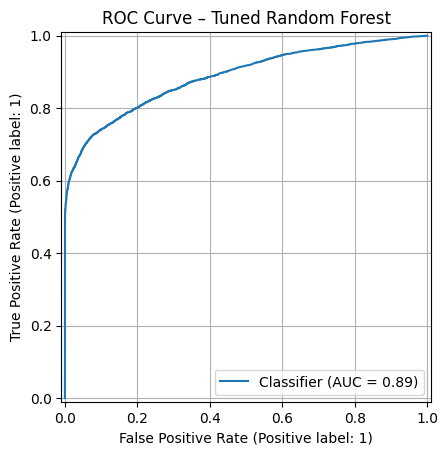

In [ ]:
# random forrest model 1

# ============================
# Feature groups
# ============================

cat_features = [
    "loan_limit", "Gender", "approv_in_adv", "loan_type", "loan_purpose",
    "Credit_Worthiness", "open_credit", "business_or_commercial",
    "Neg_ammortization", "interest_only", "lump_sum_payment",
    "construction_type", "occupancy_type", "Secured_by", "total_units",
    "credit_type", "co-applicant_credit_type", "age",
    "submission_of_application", "Region", "Security_Type"
]

num_features = [
    "loan_amount", "term", "property_value", "income",
    "Credit_Score", "LTV", "dtir1"
]

flag_features = [
    "dtir1_missing",
    "property_value_missing",
    "LTV_missing"
]

# ============================
# Preprocessor (dense OHE for RF)
# ============================

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
        ("num", "passthrough", num_features),
        ("flag", "passthrough", flag_features)
    ]
)


# ============================
# Optuna objective (fast + stable)
# ============================

def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 40, 80)
    max_depth = trial.suggest_int("max_depth", 6, 12)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 15, 50)
    max_features = trial.suggest_categorical("max_features", ["sqrt", 0.5])

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("clf", clf)
        ]
    )

    # 3-fold CV is enough for RF tuning
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    f1 = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="f1",
        n_jobs=1    # no nested parallelism
    ).mean()

    return f1


# ============================
# Run tuning (30 min limit + memory cleanup)
# ============================

study = optuna.create_study(direction="maximize")

study.optimize(
    objective,
    n_trials=60,          # you really don't need more for RF
    timeout=1800,         # 30 minutes
    show_progress_bar=True,
    gc_after_trial=True   # CRITICAL for preventing kernel crashes
)


# ============================
# Best parameters
# ============================

print("Best F1 (CV):", study.best_value)
print("Best params:", study.best_params)


# ============================
# Train final Random Forest model
# ============================

best_params = study.best_params

final_rf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=best_params["n_estimators"],
            max_depth=best_params["max_depth"],
            min_samples_leaf=best_params["min_samples_leaf"],
            max_features=best_params["max_features"],
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        ))
    ]
)

final_rf.fit(X_train, y_train)


# ============================
# Evaluate on test set
# ============================

y_pred = final_rf.predict(X_test)
y_proba = final_rf.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("\n===== RANDOM FOREST TEST PERFORMANCE =====")
print(f"F1 Score     : {f1:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Accuracy     : {accuracy:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# ============================
# ROC Curve
# ============================

plt.figure(figsize=(6, 6))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve – Tuned Random Forest")
plt.grid(True)
plt.show()


In [7]:
# Outlier flags
outlier_flags = [
    "loan_amount_iqr_outlier",
    "LTV_iqr_outlier",
    "dtir1_iqr_outlier",
    "income_iqr_outlier",
    "property_value_iqr_outlier",
    "Credit_Score_iqr_outlier"
]


[I 2026-01-13 17:24:47,286] A new study created in memory with name: no-name-2cca4c5d-92cc-4e4e-81de-050fd0443e28
Best trial: 0. Best value: 0.724686:   2%|▏         | 1/60 [00:11<11:26, 11.63s/it, 11.63/1800 seconds]

[I 2026-01-13 17:24:58,832] Trial 0 finished with value: 0.724685547534294 and parameters: {'n_estimators': 55, 'max_depth': 11, 'min_samples_leaf': 35, 'max_features': 0.5}. Best is trial 0 with value: 0.724685547534294.


Best trial: 1. Best value: 0.724816:   3%|▎         | 2/60 [00:20<09:53, 10.23s/it, 20.88/1800 seconds]

[I 2026-01-13 17:25:08,093] Trial 1 finished with value: 0.7248162984403729 and parameters: {'n_estimators': 42, 'max_depth': 11, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 1 with value: 0.7248162984403729.


Best trial: 1. Best value: 0.724816:   5%|▌         | 3/60 [00:30<09:20,  9.84s/it, 30.25/1800 seconds]

[I 2026-01-13 17:25:17,472] Trial 2 finished with value: 0.7211642424132046 and parameters: {'n_estimators': 43, 'max_depth': 11, 'min_samples_leaf': 47, 'max_features': 0.5}. Best is trial 1 with value: 0.7248162984403729.


Best trial: 1. Best value: 0.724816:   7%|▋         | 4/60 [00:41<09:34, 10.25s/it, 41.14/1800 seconds]

[I 2026-01-13 17:25:28,360] Trial 3 finished with value: 0.7240711427166416 and parameters: {'n_estimators': 51, 'max_depth': 11, 'min_samples_leaf': 26, 'max_features': 0.5}. Best is trial 1 with value: 0.7248162984403729.


Best trial: 4. Best value: 0.73189:   8%|▊         | 5/60 [00:56<11:14, 12.27s/it, 56.99/1800 seconds] 

[I 2026-01-13 17:25:44,205] Trial 4 finished with value: 0.7318904066757975 and parameters: {'n_estimators': 77, 'max_depth': 12, 'min_samples_leaf': 18, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  10%|█         | 6/60 [01:08<10:42, 11.89s/it, 68.15/1800 seconds]

[I 2026-01-13 17:25:55,372] Trial 5 finished with value: 0.7248633965061874 and parameters: {'n_estimators': 50, 'max_depth': 12, 'min_samples_leaf': 47, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  12%|█▏        | 7/60 [01:21<11:03, 12.51s/it, 81.94/1800 seconds]

[I 2026-01-13 17:26:09,155] Trial 6 finished with value: 0.7097481244317576 and parameters: {'n_estimators': 74, 'max_depth': 9, 'min_samples_leaf': 35, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  13%|█▎        | 8/60 [01:27<08:52, 10.24s/it, 87.31/1800 seconds]

[I 2026-01-13 17:26:14,531] Trial 7 finished with value: 0.7012167500507523 and parameters: {'n_estimators': 76, 'max_depth': 9, 'min_samples_leaf': 31, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  15%|█▌        | 9/60 [01:37<08:36, 10.13s/it, 97.19/1800 seconds]

[I 2026-01-13 17:26:24,412] Trial 8 finished with value: 0.7096208140289276 and parameters: {'n_estimators': 48, 'max_depth': 9, 'min_samples_leaf': 47, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  17%|█▋        | 10/60 [01:48<08:45, 10.51s/it, 108.55/1800 seconds]

[I 2026-01-13 17:26:35,759] Trial 9 finished with value: 0.7199332759151416 and parameters: {'n_estimators': 51, 'max_depth': 10, 'min_samples_leaf': 16, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  18%|█▊        | 11/60 [01:53<07:08,  8.74s/it, 113.28/1800 seconds]

[I 2026-01-13 17:26:40,501] Trial 10 finished with value: 0.6886667650002054 and parameters: {'n_estimators': 66, 'max_depth': 6, 'min_samples_leaf': 25, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  20%|██        | 12/60 [01:59<06:17,  7.86s/it, 119.15/1800 seconds]

[I 2026-01-13 17:26:46,284] Trial 11 finished with value: 0.7049729630040824 and parameters: {'n_estimators': 64, 'max_depth': 12, 'min_samples_leaf': 42, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  22%|██▏       | 13/60 [02:16<08:24, 10.74s/it, 136.49/1800 seconds]

[I 2026-01-13 17:27:03,674] Trial 12 finished with value: 0.7259621880094674 and parameters: {'n_estimators': 58, 'max_depth': 12, 'min_samples_leaf': 40, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  23%|██▎       | 14/60 [02:29<08:50, 11.52s/it, 149.84/1800 seconds]

[I 2026-01-13 17:27:17,049] Trial 13 finished with value: 0.6999262494770525 and parameters: {'n_estimators': 69, 'max_depth': 7, 'min_samples_leaf': 40, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  25%|██▌       | 15/60 [02:35<07:17,  9.71s/it, 155.35/1800 seconds]

[I 2026-01-13 17:27:22,564] Trial 14 finished with value: 0.7123608872231051 and parameters: {'n_estimators': 59, 'max_depth': 12, 'min_samples_leaf': 15, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  27%|██▋       | 16/60 [02:50<08:18, 11.33s/it, 170.45/1800 seconds]

[I 2026-01-13 17:27:37,661] Trial 15 finished with value: 0.7052367293559788 and parameters: {'n_estimators': 79, 'max_depth': 8, 'min_samples_leaf': 40, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  28%|██▊       | 17/60 [03:02<08:19, 11.61s/it, 182.70/1800 seconds]

[I 2026-01-13 17:27:49,909] Trial 16 finished with value: 0.7185594297984234 and parameters: {'n_estimators': 59, 'max_depth': 10, 'min_samples_leaf': 27, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  30%|███       | 18/60 [03:18<08:57, 12.80s/it, 198.27/1800 seconds]

[I 2026-01-13 17:28:05,463] Trial 17 finished with value: 0.7302669253679457 and parameters: {'n_estimators': 71, 'max_depth': 12, 'min_samples_leaf': 21, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  32%|███▏      | 19/60 [03:24<07:19, 10.71s/it, 204.10/1800 seconds]

[I 2026-01-13 17:28:11,318] Trial 18 finished with value: 0.7050162345929465 and parameters: {'n_estimators': 71, 'max_depth': 10, 'min_samples_leaf': 21, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  33%|███▎      | 20/60 [03:38<07:55, 11.90s/it, 218.77/1800 seconds]

[I 2026-01-13 17:28:25,978] Trial 19 finished with value: 0.7050623830331698 and parameters: {'n_estimators': 78, 'max_depth': 8, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  35%|███▌      | 21/60 [03:55<08:40, 13.34s/it, 235.46/1800 seconds]

[I 2026-01-13 17:28:42,674] Trial 20 finished with value: 0.7290482340977632 and parameters: {'n_estimators': 72, 'max_depth': 12, 'min_samples_leaf': 23, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  37%|███▋      | 22/60 [04:11<08:58, 14.18s/it, 251.59/1800 seconds]

[I 2026-01-13 17:28:58,807] Trial 21 finished with value: 0.7290482340977632 and parameters: {'n_estimators': 72, 'max_depth': 12, 'min_samples_leaf': 23, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  38%|███▊      | 23/60 [04:26<08:54, 14.43s/it, 266.63/1800 seconds]

[I 2026-01-13 17:29:13,848] Trial 22 finished with value: 0.7274371771041798 and parameters: {'n_estimators': 67, 'max_depth': 11, 'min_samples_leaf': 18, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  40%|████      | 24/60 [04:43<09:01, 15.05s/it, 283.12/1800 seconds]

[I 2026-01-13 17:29:30,342] Trial 23 finished with value: 0.73001720099511 and parameters: {'n_estimators': 75, 'max_depth': 12, 'min_samples_leaf': 29, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  42%|████▏     | 25/60 [04:59<09:01, 15.46s/it, 299.55/1800 seconds]

[I 2026-01-13 17:29:46,759] Trial 24 finished with value: 0.7246369261800005 and parameters: {'n_estimators': 76, 'max_depth': 11, 'min_samples_leaf': 29, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  43%|████▎     | 26/60 [05:15<08:54, 15.73s/it, 315.90/1800 seconds]

[I 2026-01-13 17:30:03,107] Trial 25 finished with value: 0.7175074440080865 and parameters: {'n_estimators': 80, 'max_depth': 10, 'min_samples_leaf': 33, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  45%|████▌     | 27/60 [05:21<06:59, 12.72s/it, 321.60/1800 seconds]

[I 2026-01-13 17:30:08,814] Trial 26 finished with value: 0.7119014911837676 and parameters: {'n_estimators': 64, 'max_depth': 12, 'min_samples_leaf': 18, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  47%|████▋     | 28/60 [05:38<07:25, 13.91s/it, 338.30/1800 seconds]

[I 2026-01-13 17:30:25,513] Trial 27 finished with value: 0.7246579337238673 and parameters: {'n_estimators': 75, 'max_depth': 11, 'min_samples_leaf': 29, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  48%|████▊     | 29/60 [05:54<07:30, 14.52s/it, 354.25/1800 seconds]

[I 2026-01-13 17:30:41,457] Trial 28 finished with value: 0.7284199152923732 and parameters: {'n_estimators': 69, 'max_depth': 12, 'min_samples_leaf': 23, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  50%|█████     | 30/60 [06:08<07:09, 14.33s/it, 368.13/1800 seconds]

[I 2026-01-13 17:30:55,343] Trial 29 finished with value: 0.7151276985668279 and parameters: {'n_estimators': 63, 'max_depth': 10, 'min_samples_leaf': 35, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  52%|█████▏    | 31/60 [06:24<07:12, 14.90s/it, 384.35/1800 seconds]

[I 2026-01-13 17:31:11,563] Trial 30 finished with value: 0.7257890427663726 and parameters: {'n_estimators': 77, 'max_depth': 11, 'min_samples_leaf': 17, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  53%|█████▎    | 32/60 [06:41<07:14, 15.51s/it, 401.28/1800 seconds]

[I 2026-01-13 17:31:28,467] Trial 31 finished with value: 0.7290482340977632 and parameters: {'n_estimators': 72, 'max_depth': 12, 'min_samples_leaf': 23, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  55%|█████▌    | 33/60 [06:58<07:12, 16.01s/it, 418.46/1800 seconds]

[I 2026-01-13 17:31:45,666] Trial 32 finished with value: 0.7304208844131264 and parameters: {'n_estimators': 73, 'max_depth': 12, 'min_samples_leaf': 21, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  57%|█████▋    | 34/60 [07:17<07:17, 16.82s/it, 437.17/1800 seconds]

[I 2026-01-13 17:32:04,343] Trial 33 finished with value: 0.7246170100094452 and parameters: {'n_estimators': 69, 'max_depth': 11, 'min_samples_leaf': 19, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  58%|█████▊    | 35/60 [07:33<06:59, 16.78s/it, 453.84/1800 seconds]

[I 2026-01-13 17:32:21,054] Trial 34 finished with value: 0.7304293157204406 and parameters: {'n_estimators': 74, 'max_depth': 12, 'min_samples_leaf': 21, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  60%|██████    | 36/60 [07:55<07:15, 18.14s/it, 475.16/1800 seconds]

[I 2026-01-13 17:32:42,342] Trial 35 finished with value: 0.7273902354317947 and parameters: {'n_estimators': 80, 'max_depth': 11, 'min_samples_leaf': 15, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  62%|██████▏   | 37/60 [08:14<07:07, 18.60s/it, 494.83/1800 seconds]

[I 2026-01-13 17:33:02,044] Trial 36 finished with value: 0.7304208844131264 and parameters: {'n_estimators': 73, 'max_depth': 12, 'min_samples_leaf': 21, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  63%|██████▎   | 38/60 [08:31<06:34, 17.94s/it, 511.25/1800 seconds]

[I 2026-01-13 17:33:18,459] Trial 37 finished with value: 0.7247932588484489 and parameters: {'n_estimators': 74, 'max_depth': 11, 'min_samples_leaf': 25, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  65%|██████▌   | 39/60 [08:45<05:51, 16.74s/it, 525.16/1800 seconds]

[I 2026-01-13 17:33:32,361] Trial 38 finished with value: 0.7288804274255497 and parameters: {'n_estimators': 55, 'max_depth': 12, 'min_samples_leaf': 21, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  67%|██████▋   | 40/60 [08:51<04:30, 13.54s/it, 531.25/1800 seconds]

[I 2026-01-13 17:33:38,437] Trial 39 finished with value: 0.7075119083946665 and parameters: {'n_estimators': 74, 'max_depth': 11, 'min_samples_leaf': 27, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  68%|██████▊   | 41/60 [09:00<03:53, 12.30s/it, 540.66/1800 seconds]

[I 2026-01-13 17:33:47,875] Trial 40 finished with value: 0.7058330092916694 and parameters: {'n_estimators': 41, 'max_depth': 8, 'min_samples_leaf': 17, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  70%|███████   | 42/60 [09:16<03:59, 13.31s/it, 556.31/1800 seconds]

[I 2026-01-13 17:34:03,524] Trial 41 finished with value: 0.7305197801815043 and parameters: {'n_estimators': 70, 'max_depth': 12, 'min_samples_leaf': 21, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  72%|███████▏  | 43/60 [09:33<04:03, 14.33s/it, 573.04/1800 seconds]

[I 2026-01-13 17:34:20,256] Trial 42 finished with value: 0.7303622006381499 and parameters: {'n_estimators': 77, 'max_depth': 12, 'min_samples_leaf': 19, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  73%|███████▎  | 44/60 [09:47<03:50, 14.40s/it, 587.61/1800 seconds]

[I 2026-01-13 17:34:34,824] Trial 43 finished with value: 0.7296115339671787 and parameters: {'n_estimators': 67, 'max_depth': 12, 'min_samples_leaf': 22, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  75%|███████▌  | 45/60 [09:58<03:18, 13.21s/it, 598.04/1800 seconds]

[I 2026-01-13 17:34:45,248] Trial 44 finished with value: 0.724020235804011 and parameters: {'n_estimators': 45, 'max_depth': 11, 'min_samples_leaf': 25, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  77%|███████▋  | 46/60 [10:14<03:17, 14.12s/it, 614.27/1800 seconds]

[I 2026-01-13 17:35:01,484] Trial 45 finished with value: 0.730917696970509 and parameters: {'n_estimators': 73, 'max_depth': 12, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  78%|███████▊  | 47/60 [10:25<02:52, 13.27s/it, 625.55/1800 seconds]

[I 2026-01-13 17:35:12,769] Trial 46 finished with value: 0.6963750221004058 and parameters: {'n_estimators': 70, 'max_depth': 6, 'min_samples_leaf': 15, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  80%|████████  | 48/60 [10:42<02:51, 14.33s/it, 642.35/1800 seconds]

[I 2026-01-13 17:35:29,558] Trial 47 finished with value: 0.7303622006381499 and parameters: {'n_estimators': 77, 'max_depth': 12, 'min_samples_leaf': 19, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  82%|████████▏ | 49/60 [10:48<02:08, 11.73s/it, 648.01/1800 seconds]

[I 2026-01-13 17:35:35,210] Trial 48 finished with value: 0.7080340035308325 and parameters: {'n_estimators': 62, 'max_depth': 11, 'min_samples_leaf': 17, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  83%|████████▎ | 50/60 [11:05<02:13, 13.33s/it, 665.08/1800 seconds]

[I 2026-01-13 17:35:52,269] Trial 49 finished with value: 0.7286490771442032 and parameters: {'n_estimators': 67, 'max_depth': 12, 'min_samples_leaf': 25, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  85%|████████▌ | 51/60 [11:22<02:11, 14.64s/it, 682.78/1800 seconds]

[I 2026-01-13 17:36:09,997] Trial 50 finished with value: 0.7306921495396672 and parameters: {'n_estimators': 78, 'max_depth': 12, 'min_samples_leaf': 20, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  87%|████████▋ | 52/60 [11:38<01:59, 14.94s/it, 698.42/1800 seconds]

[I 2026-01-13 17:36:25,638] Trial 51 finished with value: 0.7305776488498203 and parameters: {'n_estimators': 75, 'max_depth': 12, 'min_samples_leaf': 19, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  88%|████████▊ | 53/60 [11:55<01:48, 15.45s/it, 715.06/1800 seconds]

[I 2026-01-13 17:36:42,280] Trial 52 finished with value: 0.7304164505666512 and parameters: {'n_estimators': 78, 'max_depth': 12, 'min_samples_leaf': 19, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  90%|█████████ | 54/60 [12:13<01:38, 16.48s/it, 733.95/1800 seconds]

[I 2026-01-13 17:37:01,146] Trial 53 finished with value: 0.7317211345516141 and parameters: {'n_estimators': 75, 'max_depth': 12, 'min_samples_leaf': 17, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  92%|█████████▏| 55/60 [12:34<01:28, 17.60s/it, 754.17/1800 seconds]

[I 2026-01-13 17:37:21,369] Trial 54 finished with value: 0.7311036451967748 and parameters: {'n_estimators': 79, 'max_depth': 12, 'min_samples_leaf': 16, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  93%|█████████▎| 56/60 [12:51<01:09, 17.47s/it, 771.32/1800 seconds]

[I 2026-01-13 17:37:38,539] Trial 55 finished with value: 0.7157892837566338 and parameters: {'n_estimators': 79, 'max_depth': 10, 'min_samples_leaf': 50, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  95%|█████████▌| 57/60 [12:57<00:42, 14.02s/it, 777.29/1800 seconds]

[I 2026-01-13 17:37:44,506] Trial 56 finished with value: 0.7108637168318933 and parameters: {'n_estimators': 76, 'max_depth': 11, 'min_samples_leaf': 16, 'max_features': 'sqrt'}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  97%|█████████▋| 58/60 [13:15<00:30, 15.37s/it, 795.82/1800 seconds]

[I 2026-01-13 17:38:03,033] Trial 57 finished with value: 0.7310310913189824 and parameters: {'n_estimators': 78, 'max_depth': 12, 'min_samples_leaf': 16, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189:  98%|█████████▊| 59/60 [13:30<00:15, 15.28s/it, 810.89/1800 seconds]

[I 2026-01-13 17:38:18,109] Trial 58 finished with value: 0.7014349278157489 and parameters: {'n_estimators': 80, 'max_depth': 7, 'min_samples_leaf': 16, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.


Best trial: 4. Best value: 0.73189: 100%|██████████| 60/60 [13:48<00:00, 13.80s/it, 828.21/1800 seconds]


[I 2026-01-13 17:38:35,423] Trial 59 finished with value: 0.7309436691679947 and parameters: {'n_estimators': 78, 'max_depth': 12, 'min_samples_leaf': 15, 'max_features': 0.5}. Best is trial 4 with value: 0.7318904066757975.
Best F1 (CV): 0.7318904066757975
Best params: {'n_estimators': 77, 'max_depth': 12, 'min_samples_leaf': 18, 'max_features': 0.5}

===== RANDOM FOREST TEST PERFORMANCE =====
F1 Score     : 0.7484
Recall       : 0.7107
Accuracy     : 0.8822
ROC AUC      : 0.8892

Confusion Matrix:
[[10512   691]
 [ 1060  2604]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92     11203
           1       0.79      0.71      0.75      3664

    accuracy                           0.88     14867
   macro avg       0.85      0.82      0.84     14867
weighted avg       0.88      0.88      0.88     14867



<Figure size 600x600 with 0 Axes>

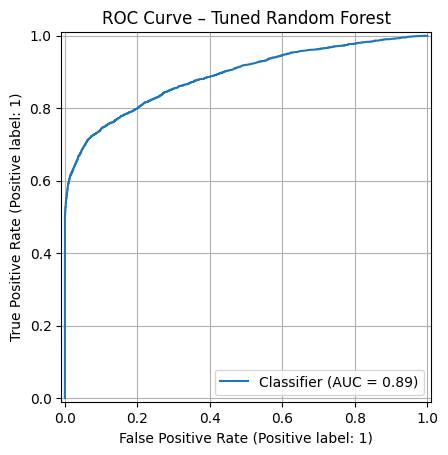

In [8]:
# random forrest model 2 including the outlier flags

# ============================
# Feature groups
# ============================

cat_features = [
    "loan_limit", "Gender", "approv_in_adv", "loan_type", "loan_purpose",
    "Credit_Worthiness", "open_credit", "business_or_commercial",
    "Neg_ammortization", "interest_only", "lump_sum_payment",
    "construction_type", "occupancy_type", "Secured_by", "total_units",
    "credit_type", "co-applicant_credit_type", "age",
    "submission_of_application", "Region", "Security_Type"
]

num_features = [
    "loan_amount", "term", "property_value", "income",
    "Credit_Score", "LTV", "dtir1"
]

# Missingness flags + Outlier flags
flag_features = [
    "dtir1_missing",
    "property_value_missing",
    "LTV_missing"
] + outlier_flags


# ============================
# Preprocessor (dense OHE for RF)
# ============================

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
        ("num", "passthrough", num_features),
        ("flag", "passthrough", flag_features)
    ]
)


# ============================
# Optuna objective (fast + stable)
# ============================

def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 40, 80)
    max_depth = trial.suggest_int("max_depth", 6, 12)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 15, 50)
    max_features = trial.suggest_categorical("max_features", ["sqrt", 0.5])

    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    )

    pipeline = Pipeline(
        steps=[
            ("preprocess", preprocessor),
            ("clf", clf)
        ]
    )

    # 3-fold CV is enough for RF tuning
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    f1 = cross_val_score(
        pipeline,
        X_train,
        y_train,
        cv=cv,
        scoring="f1",
        n_jobs=1    # no nested parallelism
    ).mean()

    return f1


# ============================
# Run tuning (30 min limit + memory cleanup)
# ============================

study = optuna.create_study(direction="maximize")

study.optimize(
    objective,
    n_trials=60,          # you really don't need more for RF
    timeout=1800,         # 30 minutes
    show_progress_bar=True,
    gc_after_trial=True   # CRITICAL for preventing kernel crashes
)


# ============================
# Best parameters
# ============================

print("Best F1 (CV):", study.best_value)
print("Best params:", study.best_params)


# ============================
# Train final Random Forest model
# ============================

best_params = study.best_params

final_rf = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("clf", RandomForestClassifier(
            n_estimators=best_params["n_estimators"],
            max_depth=best_params["max_depth"],
            min_samples_leaf=best_params["min_samples_leaf"],
            max_features=best_params["max_features"],
            class_weight="balanced",
            random_state=42,
            n_jobs=-1
        ))
    ]
)

final_rf.fit(X_train, y_train)


# ============================
# Evaluate on test set
# ============================

y_pred = final_rf.predict(X_test)
y_proba = final_rf.predict_proba(X_test)[:, 1]

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
cm = confusion_matrix(y_test, y_pred)

print("\n===== RANDOM FOREST TEST PERFORMANCE =====")
print(f"F1 Score     : {f1:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"Accuracy     : {accuracy:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# ============================
# ROC Curve
# ============================

plt.figure(figsize=(6, 6))
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve – Tuned Random Forest")
plt.grid(True)
plt.show()
